# Семинар 3

## Линейная задача наименьших квадратов, решение линейных систем и QR разложение

## Кластеризация и матричные разложения

- Задача кластеризации относится к классу задач обучения без учителя, в которой требуется разбить наборы объектов на группы, в которых содержатся похожие объекты

<img src="./clustering_demo.png">

Картинка из [этого](https://towardsdatascience.com/semantic-similarity-classifier-and-clustering-sentences-based-on-semantic-similarity-a5a564e22304) поста.

- Отличие от классификации - меток объектов нет
- Классический алгоритм решения такой задачи называется *k-means* или метод $k$-средних

### $k$-means

- Выбираем число кластеров $k$
- Выбираем так называемые центры клатеров
- Повторяем до сходимости
    - Размечаем объекты на основании того, к какому центру они ближе
    - Обновляем центр как среднее значение точек из каждого кластера

- Подробности будут в курсе по машинному обучению

### Визуализация

<img width=400 src="./K-means_convergence.gif">

### Причём тут матричные разложения?

- Пусть дано $N$ объектов, каждый из которых описывается $n$ числами.
- Данные $N$ объектов уложены по столбцам в матрицу $X$
- **Утверждение.** Алгоритм $k$-means решает следующую задачу оптимизации

$$ \| X - ZC\|^2_F \to \min, $$
 
где $X \in \mathbb{R}^{n \times N}$, $Z \in \mathbb{R}^{n \times k}$ и $C$ размера $k \times N$
- Матрица $C$ обладает следующим свойством

$$ C_{ij} = \begin{cases} 1, & x_j \in \mathcal{C}_i \\ 0, & \text{иначе}, \end{cases} $$

где $\mathcal{C}_i$ обозначает $i$-ый кластер, а $x_j$ – $j$-ый объект.

- В каждом столбце матрицы $C$ ровно одна 1

**Q:** что такое матрица $Z$?

**Q:** какая интерпретация у столбцов матрицы $X - ZC$?

## Постановка линейной задачи наименьших квадратов: напоминание

- Дана переопределённая система линейных уравнений с матрицей $A$, в которой строк больше, чем столбцов, и правой частью $b$
- Задача решения такой системы в смысле наименьших квадратов записывается в виде


$$\Vert A x - b \Vert_2 \rightarrow \min_{x}$$

- Нормальное уравнение

$$ A^* A x = A^* b $$

## Решение и метод вычисления

- Псевдообратная матрица 

$$A^{\dagger} = \lim_{\alpha \rightarrow 0}(\alpha I + A^* A)^{-1} A^*$$ 

- Решение записывается как 

$$ x = A^{\dagger}b $$

- Вычисление псевдообратной матрицы из SVD

    Пусть $A = U \Sigma V^*$ SVD матрицы $A$. Тогда,

    $$A^{\dagger} = V \Sigma^{\dagger} U^*,$$

    где $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел матрицы $A$.

- Решение вычисляется с помощью QR разложения матрицы $A$

$$
Rx = Q^* b.
$$

### Сравнение методов решения нормального уравнения

- Метод Гаусса
- QR разложение

In [1]:
import numpy as np
import scipy.linalg as splin

def lsqr_solver(A, b):
    Q, R = np.linalg.qr(A)
    return splin.solve_triangular(R, Q.T @ b, lower=False)
#     return np.linalg.solve(R, Q.T @ b)

def ls_gramm_solver(A, b):
    gram_mat = A.T @ A
    return np.linalg.solve(gram_mat, A.T @ b)

In [2]:
n = 1000
m = 10*n
A = np.random.randn(m, n)
x_true = np.random.randn(n)
b = A @ x_true + 0.001 * np.random.randn(m)
x = lsqr_solver(A, b)
print(np.linalg.norm(A @ x - b))
x = ls_gramm_solver(A, b)
print(np.linalg.norm(A @ x - b))

0.09542139390206254
0.0954213939020595


In [3]:
dim_range = [10**i for i in range(1, 4)]
time_qr_range = []
time_gram_range = []
for n in dim_range:
    m = 10*n
    A = np.random.randn(m, n)
    x_true = np.random.randn(n)
    b = A @ x_true + 0.01 * np.random.randn(m)
    t = %timeit -o -q -r 1 lsqr_solver(A, b) 
    time_qr_range.append(t.best)
    t = %timeit -o -q -r 1 ls_gramm_solver(A, b)
    time_gram_range.append(t.best)

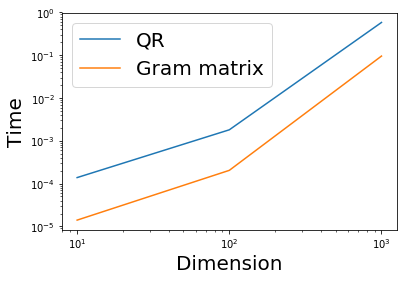

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dim_range, time_qr_range, label="QR")
plt.plot(dim_range, time_gram_range, label="Gram matrix")
plt.legend(fontsize=20)
plt.xlabel("Dimension", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.yscale("log")
plt.xscale("log")

### Свойства псевдообратной матрицы

- $A = AA^{\dagger}A$
- $A^{\dagger} = A^{\dagger}A A^{\dagger}$

### Закон Мура

- Количество транзизисторов на интегральной схеме удваивается каждые полтора-два года

In [5]:
import pandas as pd

year_transistor = {
1971: 2250,
1972: 2500,
1974: 5000,
1978: 29000,
1982: 120000,
1985: 275000,
1989: 1180000,
1993: 3100000,
1997: 7500000,
1999: 24000000,
2000: 42000000,
2002: 220000000,
2003: 410000000
}

data = pd.DataFrame([year_transistor])
data

,1971,1972,1974,1978,1982,1985,1989,1993,1997,1999,2000,2002,2003
0,2250,2500,5000,29000,120000,275000,1180000,3100000,7500000,24000000,42000000,220000000,410000000


In [6]:
data = pd.DataFrame(list(year_transistor.items()), columns=["Year", "N"])
data

,Year,N
0,1971,2250
1,1972,2500
2,1974,5000
3,1978,29000
4,1982,120000
5,1985,275000
6,1989,1180000
7,1993,3100000
8,1997,7500000
9,1999,24000000


### Модель

$$ \log_{10} N \approx  w_1 + w_2 (t - 1970)$$

- Логарифмирование – очень полезный приём преобразования данных, масштабы которых сильно отличаются 

In [7]:
y = np.log10(data["N"])
x = data["Year"] - 1970
X = np.ones((13, 2))
X[:, 1] = x
print(X)
print(y)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  4.]
 [ 1.  8.]
 [ 1. 12.]
 [ 1. 15.]
 [ 1. 19.]
 [ 1. 23.]
 [ 1. 27.]
 [ 1. 29.]
 [ 1. 30.]
 [ 1. 32.]
 [ 1. 33.]]
0     3.352183
1     3.397940
2     3.698970
3     4.462398
4     5.079181
5     5.439333
6     6.071882
7     6.491362
8     6.875061
9     7.380211
10    7.623249
11    8.342423
12    8.612784
Name: N, dtype: float64


In [8]:
w = np.linalg.lstsq(X, y, rcond=None)[0]
print(np.linalg.norm(X @ w - y))
print(w)

0.7322034084305008
[3.12559263 0.15401818]


Text(0, 0.5, '# transistors')

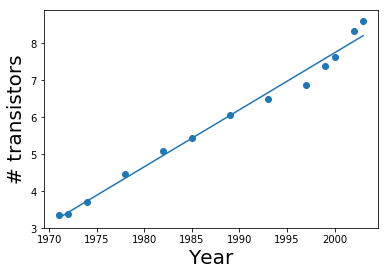

In [9]:
plt.scatter(data["Year"], y)
plt.plot(data["Year"], X @ w)
plt.xlabel("Year", fontsize=20)
plt.ylabel("# transistors", fontsize=20)

### Предсказание на 2015 год

- Микропроцессор IBM Z13 содержит $4 \cdot 10^9$ транзисторов

In [10]:
year = 2015
pred_given_year = w[0] + w[1]* (year - 1970)
print(pred_given_year)
print(np.log10(4e9))

10.05641072680136
9.602059991327963


### Модель авторегрессии в прогнозировании временных рядов

- Дан временной ряд, например температура (и другие данные из метеорологии) в разное время, цены активов и прочее
- Почти всегда временной ряд – это нелинейная функция.
- Зачастую она периодична
- Простейшая модель – авторегрессионная
- Идея в прогнозировании $k+1$ значения по последним $M$
- Модель остаётся линейной!

$$\hat{x}_{k+1} = w_1 x_k + \ldots + w_M x_{k - M + 1} $$

- Целевая функция – сумма квадратов невязок (опять!) 

$$ (x_{k+1} - \hat{x}_{k+1})^2 + \ldots + (x_T - \hat{x}_T)^2 \to \min_w $$

- Как представить эту задачу в виде $\|Xw - y \|^2_2 \to \min_w$ ?

- Каким свойством обладает матрица $X$?

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


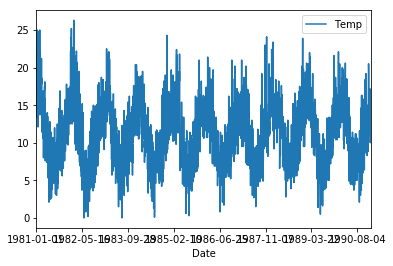

In [11]:
import pandas as pd

series = pd.read_csv('./daily-min-temperatures.csv', header=0, index_col=0)
print(series.head())
series.plot()

(3650,)


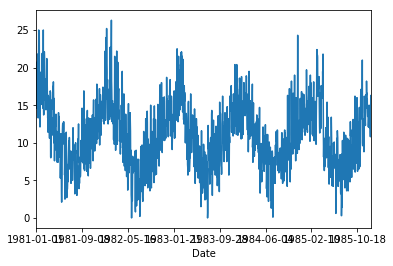

In [12]:
x = series["Temp"]
print(x.shape)
train_x = x[:x.shape[0] // 2]
test_x = x[x.shape[0] // 2:]
train_x.plot()

In [13]:
mean_forecast = train_x.mean()
print(np.linalg.norm(train_x - mean_forecast))

182.0535788062525


In [14]:
prev_forecast = train_x[:-1].values
# print(prev_forecast)
print(np.linalg.norm((train_x[1:].values - prev_forecast)))

120.3297552561294


In [15]:
M = 3
X = splin.toeplitz(train_x[M-1:], train_x[:M][::-1])
y = train_x[M-1:]
print(X.shape, y.shape)
w = np.linalg.lstsq(X, y, rcond=None)[0]
print(np.linalg.norm(X @ w - y))

(1823, 3) (1823,)
1.835198143033203e-13


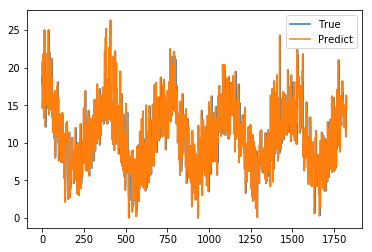

In [16]:
plt.plot(train_x.values, label="True")
plt.plot(X @ w, label="Predict")
plt.legend()

In [17]:
test_X = splin.toeplitz(test_x[M-1:], test_x[:M][::-1])
test_pred = test_X @ w
print(np.linalg.norm(test_pred - test_x[M-1:]))

1.8554627002946953e-13


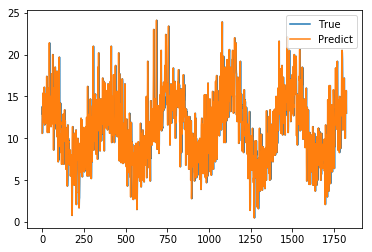

In [18]:
plt.plot(test_x.values, label="True")
plt.plot(test_pred, label="Predict")
plt.legend()

### Полиномиальная регрессия

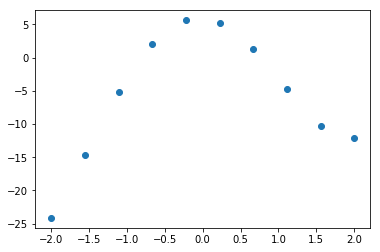

In [68]:
num_points = 10
x = np.linspace(-2, 2, num=num_points)
y = 5 - x - 10 * x**2 + x**3 + x**4
y_noise = y + np.random.randn()
plt.scatter(x, y_noise)

In [69]:
deg = 4
V = np.vander(x, deg+1)
print(V)

[[ 1.60000000e+01 -8.00000000e+00  4.00000000e+00 -2.00000000e+00
   1.00000000e+00]
 [ 5.85520500e+00 -3.76406036e+00  2.41975309e+00 -1.55555556e+00
   1.00000000e+00]
 [ 1.52415790e+00 -1.37174211e+00  1.23456790e+00 -1.11111111e+00
   1.00000000e+00]
 [ 1.97530864e-01 -2.96296296e-01  4.44444444e-01 -6.66666667e-01
   1.00000000e+00]
 [ 2.43865264e-03 -1.09739369e-02  4.93827160e-02 -2.22222222e-01
   1.00000000e+00]
 [ 2.43865264e-03  1.09739369e-02  4.93827160e-02  2.22222222e-01
   1.00000000e+00]
 [ 1.97530864e-01  2.96296296e-01  4.44444444e-01  6.66666667e-01
   1.00000000e+00]
 [ 1.52415790e+00  1.37174211e+00  1.23456790e+00  1.11111111e+00
   1.00000000e+00]
 [ 5.85520500e+00  3.76406036e+00  2.41975309e+00  1.55555556e+00
   1.00000000e+00]
 [ 1.60000000e+01  8.00000000e+00  4.00000000e+00  2.00000000e+00
   1.00000000e+00]]


In [73]:
w = np.linalg.lstsq(V, y_noise, rcond=None)[0]
print(w)
x_test = np.linspace(-3, 3, num=20)
y_pred = np.vander(x_test, deg+1) @ w
y_test_true = 5 - x_test - 10 * x_test**2 + x_test**3 + x_test**4
print(np.linalg.norm(y_pred - y_test_true))

[  1.           1.         -10.          -1.           5.88522406]
3.958842362107766


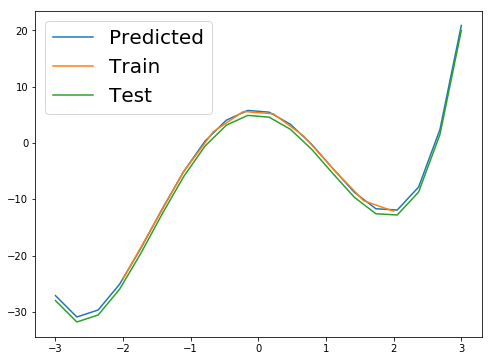

In [72]:
plt.figure(figsize=(8, 6))
plt.plot(x_test, y_pred, label="Predicted")
plt.plot(x, y_noise, label="Train")
plt.plot(x_test, y_test_true, label="Test")
plt.legend(fontsize=20)

### Томография сетей 

- Дана сеть из $n$ рёбер
- Каждое ребро вносит некоторую задержку $d_i$
- Чтобы выяснить характеристики сети, то есть найти вектор $d$, по сети запускают большое число сигналов по различным маршрутам и измеряют время прохождения сигнала $t_i$, $i=1,\ldots, N$ по известному маршруту
- Маршрут описывается бинарной матрицей $P$ размера $N \times n$ такой что

$$p_{ij} = \begin{cases} 1, & j \in \mathcal{P}_i\\ 0, & \text{иначе}, \end{cases} $$

где $\mathcal{P}_i$ – путь $i$.

- Необходимо по матрице $P$ и вектору $t$ определить вектор $d$, описывающий сеть

**Приложения**

- Дорожные сети
- Компьютерные сети

## Решение линейных систем, обратная матрица

### Напоминание основных фактов

- Линейная система имеет вид

$$ Ax = b,$$

с квадратной $n \times n$ матрицей $A$

- Для любой матрицы существуют PLU разложение

$$ A = PLU, $$

$P$ – матрица перестановки, $L$ – нижнетреугольная матрица, $U$ – верхнетреугольная матрица.

- Сложность $\mathcal{O}(n^3)$
- Если $A \succ 0$, то матрица раскладывается на факторы $A = LL^*$ – разложение Холецкого 
- Обратная матрица $A^{-1}$ существует для невырожденных матриц и $AA^{-1} = A^{-1}A = I$
- Тогда $x = A^{-1}b$ или $x = U^{-1}L^{-1}P^*b$

### Push-through identity

- Дано $A \in \mathbb{R}^{m \times n}$, $B \in \mathbb{R}^{n \times m}$ и $I + AB$ обратима
- Покажем, что и $I + BA$ обратима
- Также покажем, что $(I + BA)^{-1}B = B(I + AB)^{-1}$ 

### Формула Шермана-Морисона-Вудбери

- $(I+P)^{-1} = I - (I+P)^{-1}P = I - P(I+P)^{-1}$
- Ранее доказанное утверждение $(I + BA)^{-1}B = B(I + AB)^{-1}$ 
- Применим к $(I + UV)^{-1} = I - UV(I + UV)^{-1} = I - U(I + VU)^{-1}V$
- Формула Шермана-Морисона-Вудбери

$$(A + UCV)^{-1} = A^{-1} - A^{-1}U (C^{-1} + VA^{-1}U)^{-1}VA^{-1} $$

### Моделирование миграции населения

- Пусть $x_t \in \mathbb{R}^{100}$ распределение населения по возрастам в год $t$
- Динамика этого распределения описывается во времени как 

$$ x_{t+1} = Ax_t + u $$

- Что такое $u$?
- Какой вид имеет матрица $A$ ?

#### Определение миграционной политики

- Дан вектор $x_1$, матрица $A$ и желаемое распределение $x_T = x_d$
- Необходимо найти такой вектор $u$, чтобы желаемое распределение было достигнуто

### Определение координат по дополнительным измерениям

- Дано положение 4 объектов в пространстве $a_1$, $a_2$, $a_3$ и $a_4$
- Известны расстояния между ними и искомым объектом $x$: $r_1$, $r_2$, $r_3$ и $r_4$
- Как определить положение $x$?

### Выигрыш от LU факторизации при решении систем с многими правыми частями

- Дан набор систем $Ax = b_1$, $Ax = b_2, \ldots$
- Посмотрим на выигрыш в скорости при использовании однократной факторизации матрицы $A$

In [30]:
n = 1000
time_factor = []
time_full = []
A = np.random.randn(n, n)
t = %timeit -o -q -r 5 splin.lu_factor(A)
factor_time = t.best
lu = splin.lu_factor(A)
num_rhs = 10
for i in range(num_rhs):
    x_true = np.random.randn(n)
    b = A @ x_true
    t = %timeit -o -q np.linalg.solve(A, b)
    time_full.append(t.best)
    t = %timeit -o -q splin.lu_solve(lu, b)
    time_factor.append(t.best)

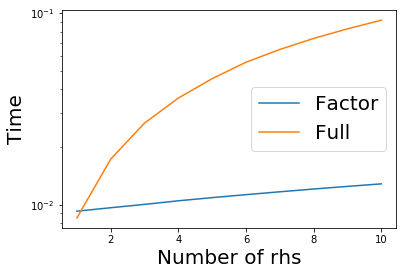

In [34]:
plt.plot(np.arange(1, num_rhs+1), factor_time + np.cumsum(np.array(time_factor)), label="Factor")
plt.plot(np.arange(1, num_rhs+1), np.cumsum(np.array(time_full)), label="Full")
plt.legend(fontsize=20)
plt.xlabel("Number of rhs", fontsize=20)
plt.ylabel("Time", fontsize=20)
plt.yscale("log")

### Резюме

- Решение задачи кластеризации как вычисление матричного разложения
- Приложения задачи наименьших квадратов
- Приложения и свойства обратных матриц и систем линейных уравнений